In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from ipywidgets import interact, FloatSlider
from numpy.random import seed, randn
from sklearn.decomposition import PCA

In [2]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["font.size"] = 13

### Seattle Housing

In [3]:
data = pd.read_csv(fr"C:\Users\cegom\Downloads\train.csv")

In [31]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

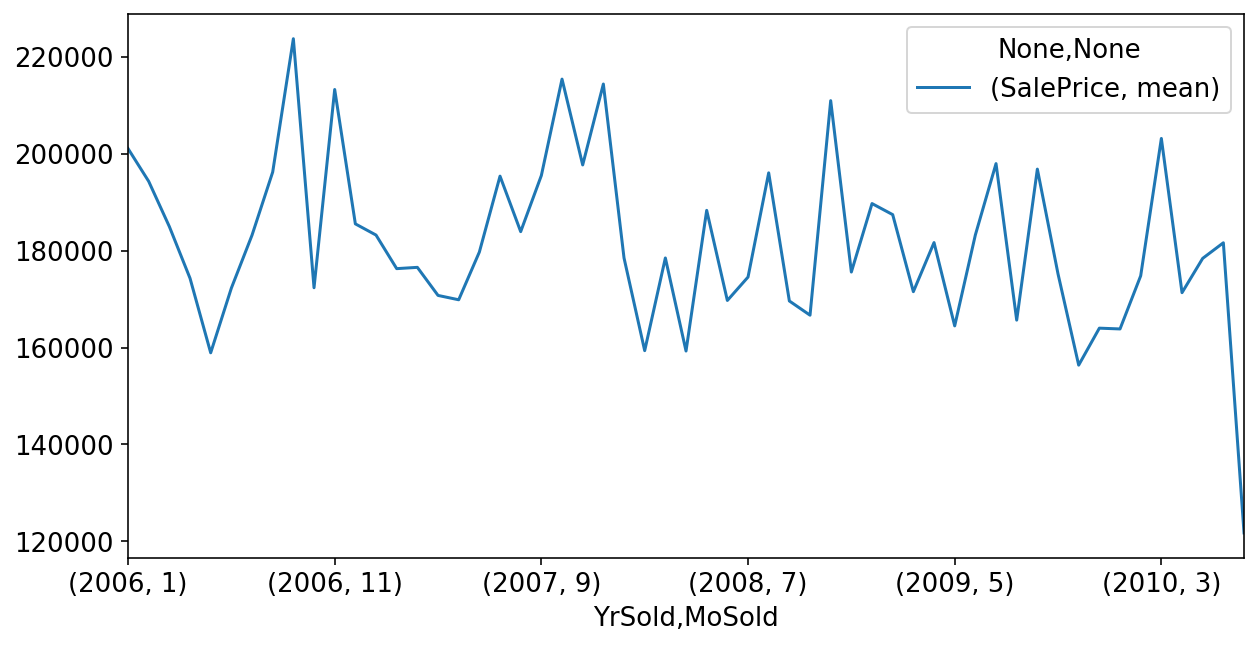

In [34]:
data.groupby(["YrSold","MoSold"]).agg({"SalePrice":["mean"]}).plot()
plt.show()

In [4]:
y = data.SalePrice
X = data.drop(columns = "SalePrice")

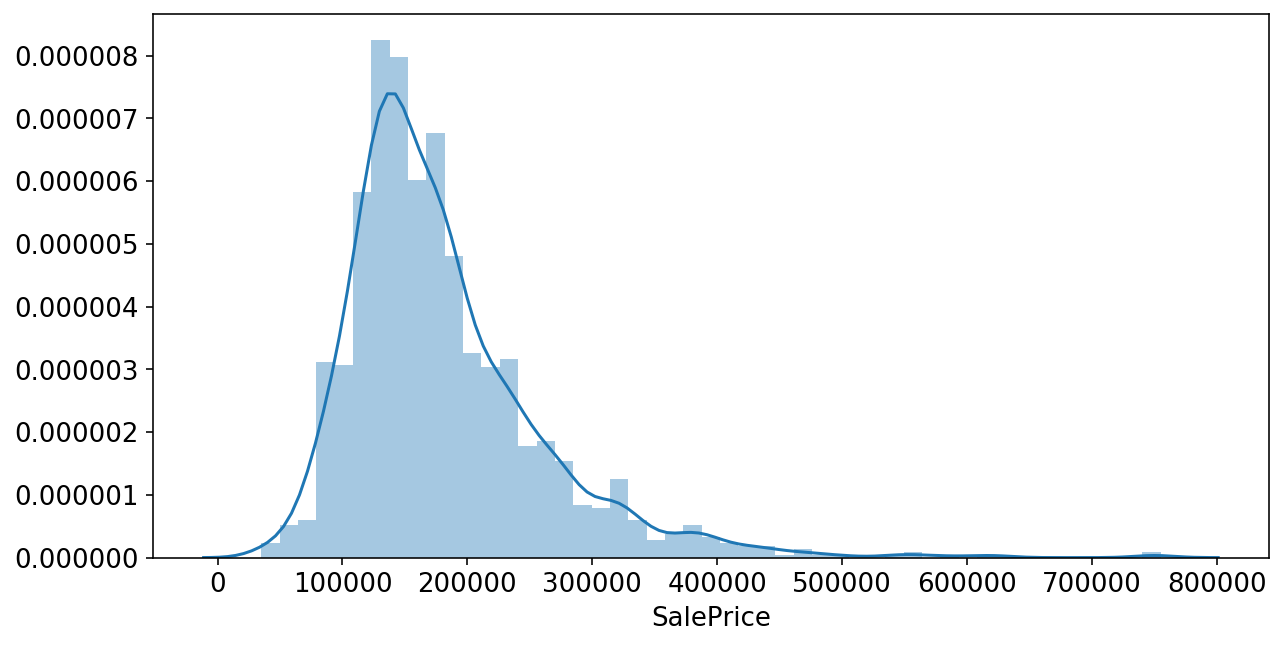

In [5]:
sns.distplot(y)
plt.show()

In [6]:
column_selector = ColumnTransformer(
    [("label_bin", make_pipeline(OneHotEncoder(sparse=False),StandardScaler()), ["MSZoning", "Utilities", "LotConfig", "Condition1", "Condition2", "BldgType", "HouseStyle", "OverallQual", "OverallCond", "KitchenQual","SaleCondition"]),
     ("numeric", make_pipeline(SimpleImputer(),StandardScaler()), make_column_selector(dtype_include="float"))]
)
columns_ohe = column_selector.fit_transform(X)
columns_ohe

array([[-0.08304548, -0.21585871, -0.10526316, ..., -0.22937175,
         0.51141841,  1.02115667],
       [-0.08304548, -0.21585871, -0.10526316, ...,  0.4519361 ,
        -0.57441047, -0.10448286],
       [-0.08304548, -0.21585871, -0.10526316, ..., -0.09311018,
         0.32306034,  0.93777596],
       ...,
       [-0.08304548, -0.21585871, -0.10526316, ..., -0.18395123,
        -0.57441047, -1.56364521],
       [-0.08304548, -0.21585871, -0.10526316, ..., -0.09311018,
        -0.57441047, -1.18843203],
       [-0.08304548, -0.21585871, -0.10526316, ...,  0.22483348,
        -0.57441047, -0.56307674]])

In [7]:
pca = PCA(svd_solver='full')
pca.fit(columns_ohe)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

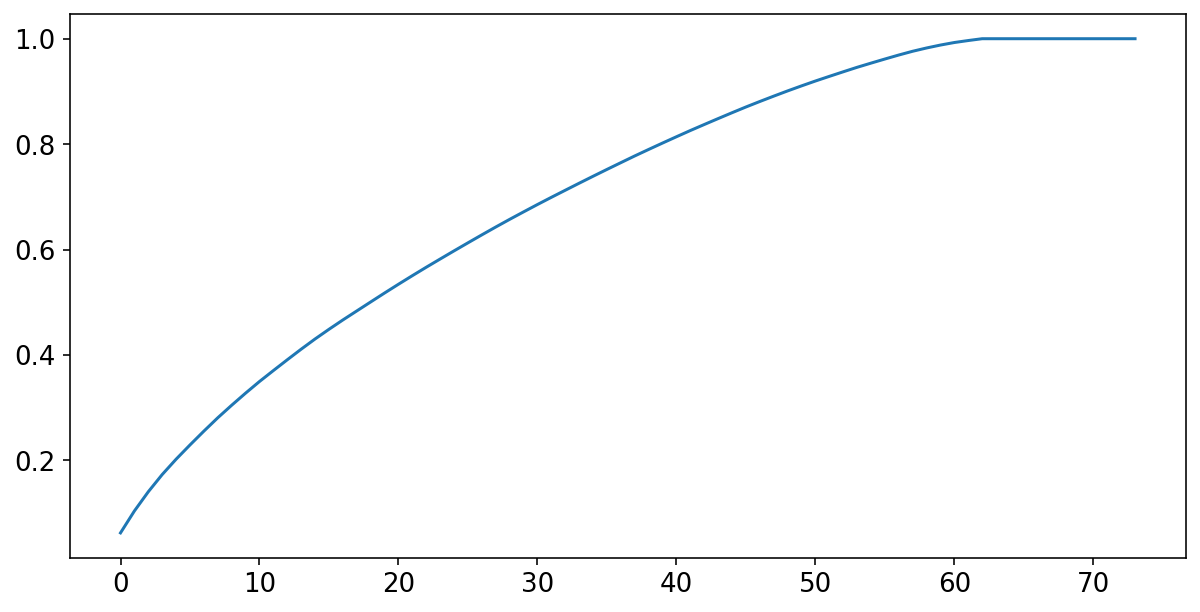

In [8]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

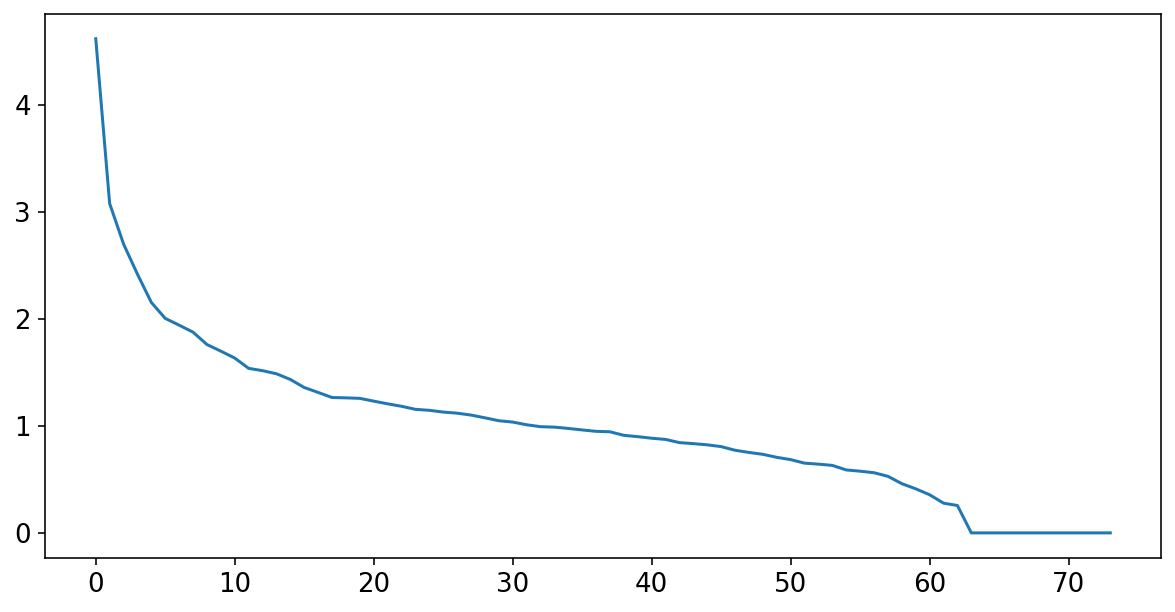

In [9]:
plt.plot(pca.explained_variance_)
plt.show()

In [10]:
columns_res = pca.transform(columns_ohe)

In [130]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression, RANSACRegressor
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [212]:
column_selector = ColumnTransformer(
    [("label_bin", make_pipeline(OneHotEncoder(sparse=False, handle_unknown = "ignore"),StandardScaler()), ["MSZoning", "Utilities", "LotConfig", "Condition1", "Condition2", "BldgType", "HouseStyle", "OverallQual", "OverallCond", "KitchenQual","SaleCondition"]),
     ("numeric", make_pipeline(SimpleImputer(),StandardScaler()), make_column_selector(dtype_include="float"))]
)

pca = PCA(n_components = 15,svd_solver='full')

pol = PolynomialFeatures(degree = 2)


pipe_transf = Pipeline([
    ("select_cols", column_selector),
    ("pca",pca),
    ("pol",pol)
])

In [140]:
column_selector = ColumnTransformer(
    [("label_bin", make_pipeline(OneHotEncoder(sparse=False, handle_unknown = "ignore"),StandardScaler()), ["MSZoning", "Utilities", "LotConfig", "Condition1", "Condition2", "BldgType", "HouseStyle", "OverallQual", "OverallCond", "KitchenQual","SaleCondition"]),
     ("numeric", make_pipeline(SimpleImputer(),StandardScaler()), make_column_selector(dtype_include="float"))]
)

pca = PCA(n_components = 25,svd_solver='full')

pol = PolynomialFeatures(degree = 2)

pipe_lasso = Pipeline([
    ("select_cols", column_selector),
    ("pca",pca),
    ("pol",pol),
    ("lasso", Lasso(alpha=0.1, tol=0.5))
    
])

In [141]:
train, test = train_test_split(data, test_size = 0.2, random_state = 2501)
xtrain, ytrain = train.drop("SalePrice", axis=1), train["SalePrice"]

cv_lasso = (cross_validate(pipe_lasso, 
                     xtrain, ytrain,
                     cv=5, 
                     scoring=["r2", "neg_mean_absolute_error"]))
r2 = cv_lasso["test_r2"]
mae = -cv_lasso["test_neg_mean_absolute_error"]

In [142]:
print(f"mean r2: {r2.mean():0.2f}")
print(f"mean mae: {mae.mean():,.2f}")

mean r2: 0.68
mean mae: 29,291.81


In [155]:
param_grid = {
    
    'pol__degree':[2,3,4,5]
}

In [158]:
search = GridSearchCV(pipe_lasso, param_grid, scoring="r2")

In [159]:
search.fit(xtrain,ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('select_cols',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('label_bin',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('onehotencoder',
                                                                                          OneHotEncoder(categories='auto',
                                                                                                        drop=None,
                        

In [168]:
param_grid = {
    
    'pca__n_components':[5,10,15,20,25,30,35]
}

In [169]:
search = GridSearchCV(pipe_lasso, param_grid, scoring="r2")

In [170]:
search.fit(xtrain,ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('select_cols',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('label_bin',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('onehotencoder',
                                                                                          OneHotEncoder(categories='auto',
                                                                                                        drop=None,
                        

In [171]:
search.best_params_

{'pca__n_components': 15}

In [174]:
search.best_score_

0.6846787808084432

In [179]:
column_selector = ColumnTransformer(
    [("label_bin", make_pipeline(OneHotEncoder(sparse=False, handle_unknown = "ignore"),StandardScaler()), ["MSZoning", "Utilities", "LotConfig", "Condition1", "Condition2", "BldgType", "HouseStyle", "OverallQual", "OverallCond", "KitchenQual","SaleCondition"]),
     ("numeric", make_pipeline(SimpleImputer(),StandardScaler()), make_column_selector(dtype_include="float"))]
)

pca = PCA(n_components = 15,svd_solver='full')

pol = PolynomialFeatures(degree = 2)

pipe_lasso = Pipeline([
    ("select_cols", column_selector),
    ("pca",pca),
    ("pol",pol),
    ("lasso", Lasso(alpha=0.1, tol=0.5)),
    (b)
    
])

In [205]:
train, test = train_test_split(data, test_size = 0.2, random_state = 2501)
xtrain, ytrain = train.drop("SalePrice", axis=1), train["SalePrice"]

cv_lasso = (cross_validate(pipe_lasso, 
                     xtrain, ytrain,
                     cv=5, 
                     scoring=["r2", "neg_mean_absolute_error"]))
r2 = cv_lasso["test_r2"]
mae = -cv_lasso["test_neg_mean_absolute_error"]

In [206]:
print(f"mean r2: {r2.mean():0.3f}")
print(f"mean mae: {mae.mean():,.2f}")

mean r2: 0.685
mean mae: 29,266.34
